In [ ]:
import scipy
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from tqdm import tqdm
from models import RNNGC, FFGC
from dataset import DatasetMaker

import review_utils
import spatial_maps as sm

<function review_utils.band_score(ratemap, box_width)>

In [2]:
## Training parameters
timesteps = 10


In [26]:
# instantiate RNN model
model = RNNGC()

# model_name = "RNNGC_49999"
model_name = "RNNGC_49999_with_L2_alpha_0.1"

model = model.load(f"../saved-models/{model_name}.pkl")


In [27]:
dataset = DatasetMaker()

(-6.283185307179586, 6.283185307179586, -6.283185307179586, 6.283185307179586)

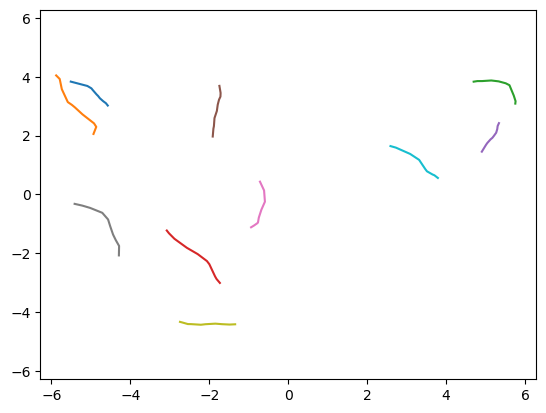

In [28]:
rt, vt = dataset.generate_data(10, timesteps, "cpu")

for i in range(10):
  plt.plot(rt[i,...,0], rt[i,...,1], "-")
plt.axis(2*np.pi*np.array([-1, 1, -1, 1]))

In [29]:
r, v = dataset.generate_data(50000, timesteps)
g = model((r[:,0], v))

r = r.detach().cpu().numpy()
g = g.detach().cpu().numpy()

ratemaps = scipy.stats.binned_statistic_2d(r[...,0].ravel(), r[...,1].ravel(), g.reshape(-1, g.shape[-1]).T, bins = 32)[0]

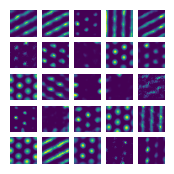

In [30]:

ns = 5 # ns x ns grid of unit ratemaps
count = 0
fig, ax = plt.subplots(ns,ns, figsize = (2,2))
for i in range(ns):
    for j in range(ns):
        ratemap = ratemaps[count]
        im = ax[i,j].imshow(ratemap)
        ax[i,j].axis("off")
        count += 1

# plt.savefig("./review_figs/all__units", )

In [35]:
# instantiate FF model
ff_model = FFGC()

model_name = "FFGC_49999_with_L2_alpha_0.1"
ff_model = ff_model.load(f"../saved-models/{model_name}.pkl")


In [37]:
x = np.linspace(-2*np.pi, 2*np.pi, 32)
xx, yy = np.meshgrid(x,x)
r = torch.tensor(np.stack((xx.ravel(),yy.ravel()), axis = -1).astype("float32"))

ff_ratemaps = ff_model(r).T.reshape(-1, 32, 32).detach().numpy()
ff_ratemaps.shape

(256, 32, 32)

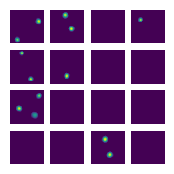

In [39]:
ns = 4 # ns x ns grid of unit ratemaps
count = 0
fig, ax = plt.subplots(ns,ns, figsize = (2,2))
for i in range(ns):
    for j in range(ns):
        im = ax[i,j].imshow(ff_ratemaps[count])
        ax[i,j].axis("off")
        count += 1

# plt.savefig("./review_figs/all_R_units", )